<a href="https://colab.research.google.com/github/harishgawade1999/Playstore-App-Review-Analysis-/blob/main/Harish_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("darkgrid")

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

In [3]:
# Mounting the drive where the dataset to work on is saved
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Defining the directory path where the data is stored
directory_path = "/content/drive/MyDrive/Google play store/"

In [5]:
# Loading the dataset as pandas data frame
apps_data = pd.read_csv(directory_path + "Play Store Data.csv")
user_reviews = pd.read_csv(directory_path + "User Reviews.csv")

## **Understanding the basics of dataset**

Let's first have a look at the structure of the dataset and understand how the data is organized.

In [6]:
# taking a glimpse of the dataset
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# checking the shape of dataset
apps_data.shape

(10841, 13)

In [8]:
# looking at the columns
apps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### <b>*Insight of the data set*</b>

It’s important to know the different types of data/variables in the given dataset. These are the different types of data present in the dataset like float, object, string.

We can observe that, our dataset contains the data of about 10841 apps found on the play store.

Dataset has 13 columns which are the parameters of the apps. Let's look at each column -

*   **App** - Name of the app
*   **Category** - type of the app
*   **Rating** - rated by the users out of 5
*   **Reviews** - number of reviews given by users
*   **Size** - size of the app in mb
*   **Installs** - number of instalations of app
*   **Type** - free or paid
*   **Price** - price in $ of paid apps
*   **Content Rating** - rating for which users can use app
*   **Genres** - category or type of app
*   **Last Updated** - date on which app updated last time
*   **Current Ver** - current version of the app
*   **Android Ver** - android version which app supports



## **Analyzing and treating missing values**

Missing values are caused by incomplete data. It is important to handle missing values effectively, as they can lead to inaccurate inferences and conclusions.

**Let's start by analyzing variables with missing values.**

In [10]:
# checking the columns which have missing values
columns_with_missing_values = apps_data.columns[apps_data.isnull().any()]
apps_data[columns_with_missing_values].isnull().sum()

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

**Yep, we do have missing values.**

Looking at number of missing values above, we notice that the column *Rating* has a lot of missing values in it. The other columns do have missing values but they are less than 10.

Let's analyze the columns with missing values so we can figure out why the data is missing. This is the point at which we get into the part of data science. It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, we'll need to use our intution to figure out why the value is missing.

Let's start with column ***Type*** 

In [11]:
# Looking at missing values in column Type
apps_data[apps_data['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


There is only one missing value. These value is probably missing because it is not recorded, rather than because it doesn't exist. So, it would make sense for us to try and guess what it would be rather than just leaving is as NaN.

After cross-checking in the dataset the app's price is 0 it means the missing value is Free, So now we can fill the missing value with *Free*

In [12]:
# filling missing data in city column
apps_data['Type'].fillna('Free', inplace= True)

Now looking at the missing value of column *Content Rating*

In [13]:
# Looking at missing values in column Content Rating
apps_data[apps_data['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Looking at missing value we cannot conclude why this data is missing. It seems that values in the row are recorded in wrong column i.e starting from Category column the value of next column is recorded in previous column.It means value in Category column is missing and we can not figure out it's value so better idea will be to drop the row.

In [14]:
apps_data.dropna(subset=['Content Rating'], inplace= True)

Android Ver and Current Ver columns will not be needed for any analysis and visualisation as they only denote the updates. So we can drop this columns.


In [15]:
# dropping unnecessary columns
apps_data.drop(columns=['Android Ver','Current Ver'], axis= 1, inplace= True)

Now looking at the missing values of column *Rating*. There are 1474 values which are missing. This ratings are given by the users. 

Let's see the distribution of the ratings.

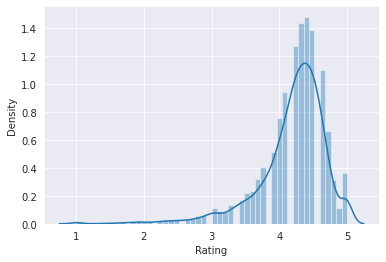

In [16]:
sns.distplot(apps_data['Rating'])
plt.show()

It depicts negatively skewed distribution and in skewed distributions, the median is the best measure because it is unaffected by extreme outliers or non-symmetric distributions of scores.

 We can replace the missing values with the median value of the column.

In [17]:
# calculating median value
median_value = apps_data['Rating'].median()

In [18]:
# replacing the missing values with median value
apps_data['Rating'].fillna(median_value, inplace= True)

Finally fixing all the missing values let's have a look at our dataset.

In [19]:
# checking the count of missing values
apps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

All the columns have null count zero it means the dataset doesn't contain any missing values.

Now our dataset is cleaned and we can start preparing our dataset.

In [20]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1016.2+ KB


Columns like Reviews, Size, Installs, Price are of object type so  we can change their data type to integer/float. 

Let's start with changing Reviews column from object to integer.

In [21]:
# changing data type of column Reviews
apps_data['Reviews'] = apps_data.Reviews.astype(int)

Now changing the type of the Size column. First looking at the unique values in the column.

In [22]:
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"


In [23]:
# apps_data['Size'].unique()

Size column contain characters M and K which denotes MB and kB so we will remove M and convert kB to MB by replacing K with e-3. 

There are some apps which size varies with device in which they are installed so we cannot predict there size or replace them with mean or median as some have small and some large size. It will be better to drop that rows with varies with devices in Size column.

In [24]:
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('M', ''))
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('k', 'e-3'))
apps_data = apps_data[apps_data['Size'] != 'Varies with device']
apps_data['Size'] = apps_data['Size'].astype(float)

To change the type of *Installs* column first we have to remove the special character '+' and ',' from the values.

In [25]:
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace('+', ''))
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace(',', ''))

In [26]:
apps_data['Installs'] = apps_data['Installs'].astype(int)

Now changing the type of Price column to float. First,  we have remove the special character '$'.

In [27]:
apps_data['Price'] = apps_data['Price'].apply(lambda x: x.replace('$', ''))
apps_data['Price'] = apps_data['Price'].astype(float)

Now looking at the last updated column it contains the date on which the app is updated/launched last time. It is of object type so we have to convert date in the date-time format.

In [28]:
# Converting 'date' dtype from object to datetime
def get_date(date_string):
  date_obj = datetime.strptime(date_string, '%B %d, %Y').date()
  return date_obj

apps_data['Last Updated'] = apps_data['Last Updated'].apply(get_date)

## **Let's have a look at the dataset after cleaning it**

In [29]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [30]:
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10835,FR Forms,BUSINESS,4.3,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25


In [31]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 857.3+ KB


In [32]:
apps_data.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9145.000000,9.145000e+03,9145.000000
mean,4.193384,2.490487e+05,21.516530,7.114842e+06,1.184366
std,0.502702,1.716211e+06,22.588748,4.619357e+07,17.355754
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,13.000000,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,30.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000


##**Observation:**


*   After cleaning we have dataset of shape 9145 rows and 11 columns i.e we have data of 9145 apps.
*   There are no missing values now and columns have their respective data types.
*   Rating for apps given by users is out of 5 having average of 4.19 rating.
*   Max size of app is 100 MB. There were apps with size varying with device which would have size more than 100 MB but we could not predict their size thats why we had to drop them.
*   There are less than 25% apps which are paid and maximum price app having is 400.

**We can now explore the dataset and perform analysis.**


##**Exploratory Analysis and Visualization:**
 As we have cleaned our play store and user review data, now we can start our exploratory analysis and visualization  .

**We can now explore the dataset and perform analysis.**

In [33]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


## 1. **Which category apps are mostly paid** ?

In [35]:
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


[]

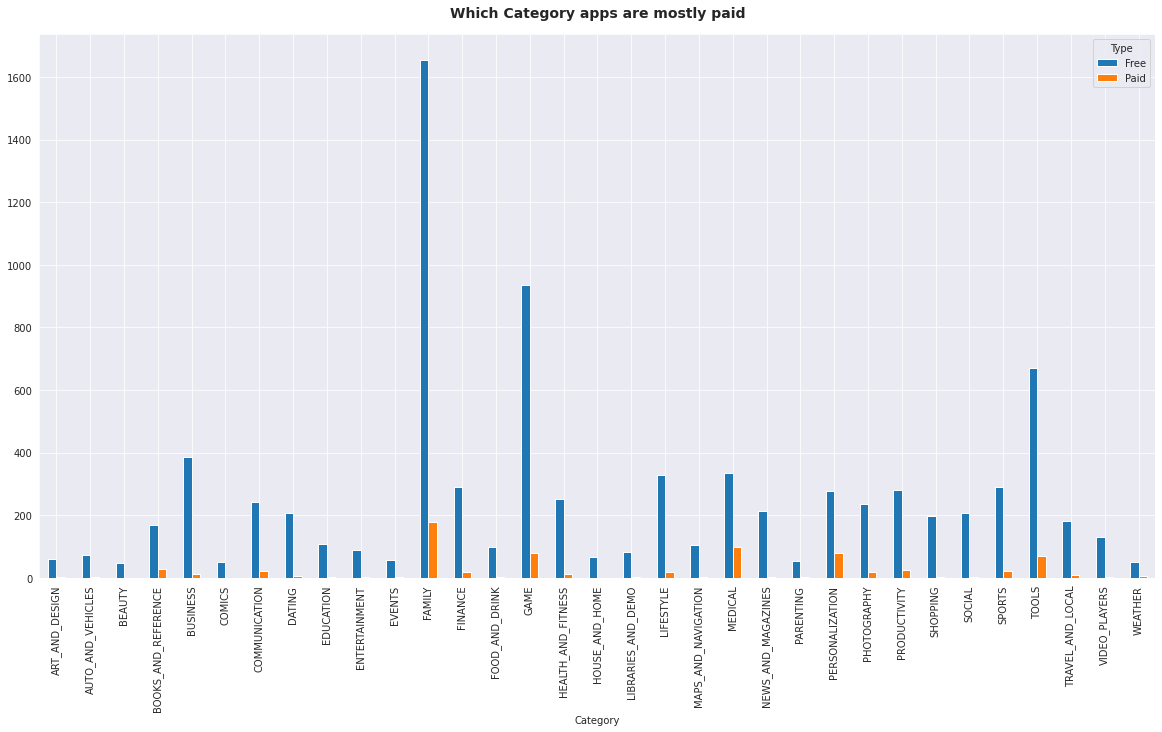

In [34]:
paid = apps_data[apps_data['Type'] == 'Paid']
Type_cat = apps_data.groupby('Category')['Type'].value_counts().unstack().plot.bar(figsize=(20,10), width=0.5)
plt.title('Which Category apps are mostly paid', fontdict={ 'fontsize': 14,'fontweight':'bold'}, y=1.02)
plt.plot()

##**Observation:**


*   From above graph we can say that, Family category has the most free and paid app on the google play store.

*    We can see social app is always free, like entertainment, event, education, comic, and more.

*   The medical has a high amount of paid app considering quantity of medical app is not much.